In [1]:
import pandas as pd


In [2]:
import seaborn as sns

C:\Users\conne\AppData\Local\Temp\ipykernel_13916\4021035418.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xcat[i]=le.fit_transform(xcat[i])
C:\Users\conne\AppData\Local\Temp\ipykernel_13916\4021035418.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xcat[i]=le.fit_transform(xcat[i])
C:\Users\conne\AppData\Local\Temp\ipykernel_13916\4021035418.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead


0.9602667551262519
0.9643402900817281
[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3.0, 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4.0, 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5.0, 5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6.0, 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9, 7.0, 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8, 7.9, 8.0, 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9.0, 9.1, 9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9, 10.0, 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8, 10.9, 11.0, 11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9, 12.0, 12.1, 12.2, 12.3, 12.4, 12.5, 12.6, 12.7, 12.8, 12.9, 13.0, 13.1, 13.2, 13.3, 13.4, 13.5, 13.6, 13.7, 13.8, 13.9, 14.0, 14.1, 14.2, 14.3, 14.4, 14.5, 14.6, 14.7, 14.8, 14.9, 15.0, 15.1, 15.2, 15.3, 15.4, 15.5, 15.6, 15.7, 15.8, 15.9, 16.0, 16.1, 16.2, 16.3, 16.4, 16.5, 16.6, 16.7, 16.8, 16.9, 17.0, 17.1, 17.2, 17.3, 17.4, 17.5, 17.6, 17.7

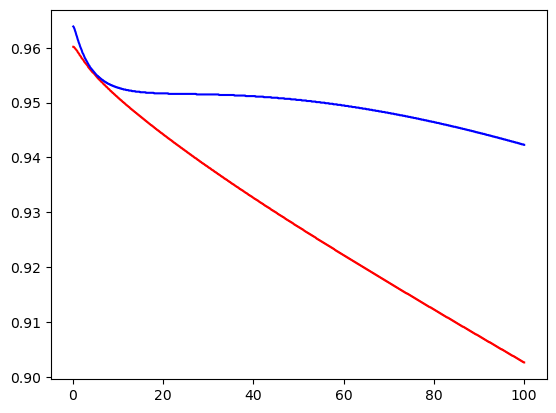

In [4]:
df=pd.read_csv('downloads/Cars93.csv')
df

df.isna().sum()

for i in df.columns:
    if df[i].dtypes==object:
        df[i]=df[i].fillna(df[i].mode()[0])
    else:
        df[i]=df[i].fillna(df[i].mean())
        
df.isna().sum()

x=df.drop(labels=['Weight','id','Make','Manufacturer','Model','AirBags'],axis=1)
y=df[['Weight']]

y.columns

cat=[]
con=[]
for i in x.columns:
    if x[i].dtypes==object:
        cat.append(i)
    else:
         con.append(i)    
cat
con

xcat=x[cat]
xcon=x[con]

from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

xcon=ss.fit_transform(xcon)
xcon=pd.DataFrame(ss.fit_transform(xcon),columns=con)
xcon



from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

xcat=x[cat]
xcat

for i in xcat.columns:
    xcat[i]=le.fit_transform(xcat[i])
xcat

x=xcon.join(xcat)
x

out=[]
for i in xcon.columns:
    ol=xcon[(xcon[i]>3)|(xcon[i]<-3)].index
    out.extend(ol)

out


import numpy as np

outlier=list(set(out))
outlier

x=x.drop(index=outlier,axis=0)
y=y.drop(index=outlier,axis=0)

x.shape
y.shape

x.index=range(0,87)
y.index=range(0,87)



from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2)
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
model=lr.fit(xtrain,ytrain)
pred=model.predict(xtest)
from sklearn.metrics import mean_absolute_error,r2_score
error=mean_absolute_error(ytest,pred)
score=r2_score(ytest,pred)
score

pred_tr=model.predict(xtrain)
pred_ts=model.predict(xtest)


tr_score=r2_score(ytrain,pred_tr)
ts_score=r2_score(ytest,pred_ts)

print(tr_score)
print(ts_score)


w=[]
e=0.1
for i in range(0,1000,1):
    w.append(e)
    e=round(e+0.1,2)
print(w)

from sklearn.linear_model import Ridge

tr=[]
ts=[]
for i in w:
    rr=Ridge(alpha=i)
    model=rr.fit(xtrain,ytrain)
    tr_pred=model.predict(xtrain)
    ts_pred=model.predict(xtest)
    
    tr_score=r2_score(ytrain,tr_pred)
    ts_score=r2_score(ytest,ts_pred)
    tr.append(round(tr_score,4))
    ts.append(round(ts_score,4))
    
print(tr)
print(ts)
    
    
import matplotlib.pyplot as plt

plt.plot(w,tr,c='red')
plt.plot(w,ts,c='blue')


tr=[]
ts=[]
for i in w[56:58]:
    rr=Ridge(alpha=i)
    model=rr.fit(xtrain,ytrain)
    tr_pred=model.predict(xtrain)
    ts_pred=model.predict(xtest)
    
    tr_score=r2_score(ytrain,tr_pred)
    ts_score=r2_score(ytest,ts_pred)
    tr.append(round(tr_score,4))
    ts.append(round(ts_score,4))
    
print(tr)
print(ts)

plt.plot(w[56:58],tr,c='red')
plt.plot(w[56:58],ts,c='blue')


rr=Ridge(alpha=58)
model=rr.fit(xtrain,ytrain)
tr_pred=model.predict(xtrain)
ts_pred=model.predict(xtest)

tr_score=r2_score(ytrain,tr_pred)
ts_score=r2_score(ytest,ts_pred)


    
print(tr_score)
print(ts_score)
    